<a href="https://colab.research.google.com/github/Saharmgh/ML-bootcamp/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Algorithm from Scratch in Python

Decision trees are machine learning models widely used for classification and regression tasks. I decided to build a decision tree from scratch to get a deeper understanding of the underlying principles behind this algorithm.

In this Jupyter Notebook, we'll walk through the step-by-step process of creating a decision tree, and by the end of this tutorial, you'll have a functional decision tree implementation.


## Outline
1. **Understanding Decision Trees:** We'll start by exploring the intuition behind decision trees.

2. **Dataset Preparation:** We'll use a simple dataset to illustrate the decision tree building process. This dataset will serve as the foundation for our implementation. Later you can test the algorithm with other datasets but keep in mind that feature values need to be categorical.

3. **Building the Decision Tree:** We'll go step by step through the algorithm for constructing a decision tree, covering topics like entropy, and gini index.

4. **Testing and Evaluation:** Once our decision tree is implemented, we'll test it on sample data and evaluate its performance.
6. **Conclusion:** We'll wrap up the tutorial with a summary of what we've learned and discuss potential enhancements and extensions.

Now, let's start.

# Step 1: Understanding Decision Trees

## What are Decision Trees?

Decision tree is a supervised machine learning model used for both classification and regression tasks. Each decision corresponds to a node in the tree, leading to a conclusion at the leaves.

## How Decision Trees Work

At the root of the tree, the algorithm evaluates different features and selects the one that best separates the data based on some criterion. This process is repeated at each internal node, creating branches that represent different outcomes based on feature values. The leaves of the tree contain the final decisions or predictions.

### Terminology:
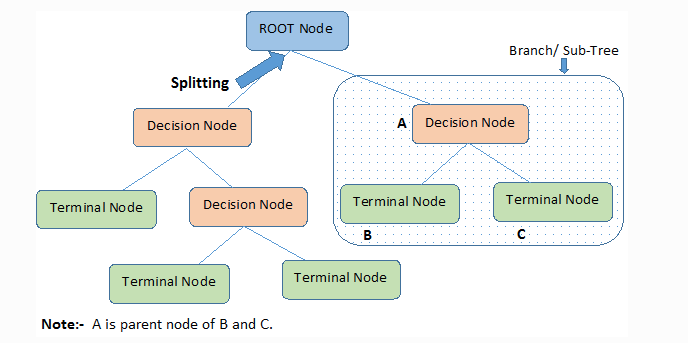

[this article](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html).
- **Root Node:** The topmost decision node in the tree.
- **Internal Nodes:** Decision nodes that lead to further nodes.
- **Leaves:** Terminal nodes that provide the final output (classification or regression).
- **Splitting:** The process of dividing a node into sub-nodes based on a chosen criterion.
- **Entropy, Information Gain and Gini Index:** Measures used to determine the best feature for splitting.

### Intuition Behind Decision Trees

Imagine you want to decide whether to play tennis on a given day. Your decision might depend on factors like the weather, temperature, and humidity. A decision tree captures this decision-making process by asking a series of questions like "Is the weather sunny?" or "Is the temperature above 25 degrees?" at each node until it reaches a leaf, providing a final decision.

In [ ]:
# import the required libraries
import numpy as np
import pandas as pd
from numpy.lib.arraysetops import unique
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Step 2: Dataset preparation

Note: Here we work with Numpy dataset because it is relatively faster than Pandas for numerical operations.

*   Test with multiclass dataset:
Definition_ A classification task where there are more than two classes, and the goal is to predict the correct class out of multiple possible classes.

In [ ]:
# imort the dataset and split it to test and train datasets
# n_features = 5
# X, y = make_blobs(centers=10, n_samples=1000, n_features=n_features)
# y = pd.Series(y)
# num_classes1= y.unique()
# Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.3)

*   Test with binary classification dataset:
Definition_ A classification task where the goal is to predict between two classes or categories.

In [ ]:
# imort the dataset and split it to test and train datasets
from sklearn.datasets import load_breast_cancer
data= load_breast_cancer()
X, y = data.data, data.target
Xt, Xv, yt, yv =train_test_split(X, y, test_size= 0.3)

## Building the Decision Tree

### Entropy in Decision Trees

Entropy is a measure of disorder or impurity in a set of data. The goal of a decision tree algorithm is to minimize entropy, leading to well-defined and homogeneous subsets at each node of the tree.

The entropy \(H(S)\) of a set \(S\) with respect to a binary classification (e.g., positive and negative classes) is calculated using the following formula:

$ H(S) = -p_+ \log_2(p_+) - p_- \log_2(p_-) $

Where:
- $p_+$ is the proportion of positive examples in set \(S\).
- $p_-$ is the proportion of negative examples in set \(S\).
- $log_2$ is the base-2 logarithm.

The entropy ranges from 0 to 1, where 0 indicates perfect homogeneity (pure set), and 1 indicates maximum impurity (equally distributed positive and negative examples).

#### Interpretation

- Low Entropy: A set with low entropy is more homogeneous and contains predominantly one class of examples. In decision tree terms, a low entropy implies a good feature for splitting the data.

- High Entropy: A set with high entropy is more heterogeneous and contains a mix of different classes. Decision tree algorithms aim to find the features that minimize entropy, making the resulting subsets more pure.

In the decision tree algorithm, the reduction in entropy, known as "Information Gain," is used to evaluate the effectiveness of a feature in splitting the data. The feature that maximizes information gain is chosen as the splitting criterion at each internal node.

In [ ]:
def entropy(target):
  p= target.value_counts()/ len(target)
  h= np.sum(p*-np.log2(p))

  return h

### Gini Index in Decision Trees

The Gini index is another measure of impurity commonly used in decision trees. Similar to entropy, the Gini index quantifies the uncertainty or disorder in a set of data.
The Gini index \(G(S)\) of a set \(S\) with respect to a binary classification (e.g., positive and negative classes) is calculated using the following formula:

$ G(S) = 1 - \sum_{i=1}^{n} p_i^2 $

Where:
- $n$ is the number of classes.
- $p_i$ is the proportion of examples in class $i$.

The Gini index ranges from 0 to 1, where 0 indicates perfect homogeneity (pure set), and 1 indicates maximum impurity (equally distributed examples among classes).

#### Interpretation

- Low Gini Index: A set with a low Gini index is more homogeneous and contains predominantly one class of examples. In decision tree terms, a low Gini index implies a good feature for splitting the data.

- High Gini Index: A set with a high Gini index is more heterogeneous and contains a mix of different classes. Decision tree algorithms aim to find the features that minimize the Gini index, making the resulting subsets more pure.

The choice between using Gini index or entropy often depends on the specific application and the characteristics of the dataset.

In [ ]:
def gini_index(target):
  p= target.value_counts()/ len(target)
  gini= 1- np.sum(p **2)
  return gini

In [ ]:
def gini_index_calculation(target, clases, *groups):
  class_size = []
  group_size = []
  split_size = 0

  split_size = np.sum([len(g) for g in groups])

  gini = 0
  for gr in groups:
    group_size = len(gr)

    p = 0
    for c in clases:
      mask = target == c
      class_size = len(gr.loc[mask])

      if group_size == 0:
        continue

      p += (class_size / group_size)**2

    g = np.sum((1 - p)) * (group_size / split_size)
    gini += g

  return gini

In [ ]:
#set splitting function for numerical features
# TODO: how to split the categorical data.
def set_split(data, feat, tresh):

  sub_right = data[data[feat] < tresh]
  sub_left = data[(data[feat] < tresh) ==False]
  return sub_right, sub_left


In [ ]:
# Greedy search to find the best split
def best_split(data, target, feat, num_classes):
  split_value= []
  gini_index_value = []
  gini_idx= []

  best_split_results = []

  for feature in feat:
    gini_idx= []

    i_ = data[feature].sort_values().unique()[1:]


    for i in i_:

      right_big, left_small = set_split(data, feature, i)
      value_gini = gini_index_calculation(target, num_classes, right_big, left_small)

      gini_idx.append(value_gini)
    if len(gini_idx)==0:
      return None,None,None
    #get results with the lowest gini_index
    best_gini_index_idx = np.argmin(gini_idx)
    best_subset_gini = gini_idx[best_gini_index_idx]
    best_subset_treshold= i_[best_gini_index_idx]

    best_feature= feature
    best_split_results.append((best_subset_gini, best_subset_treshold, best_feature))
    best_split= min(best_split_results, key= lambda x:x[0])


  return best_split

As the ouput of this cell you will get something like this: The best split is for "name of the feature" when it is <= "a specific treshold". So, we can find the best candidate for the root node.

**How to build the tree?**

In [ ]:
#make the split
def make_split(data, target, feat, num_classes):
  best_values = best_split(data, target, feat, num_classes)
  subsets= set_split(data, best_values[2], best_values[1])
  return subsets

In [ ]:
def make_prediction(label):
  pred = label.value_counts().idxmax()
  return pred

In [ ]:
# Building the tree
def train_tree(x, y, feat, max_depth=None, min_samples_split=None, max_gini=1, counter=0, max_categories=20):

    if max_depth is None:
        depth_cond = True
    else:
        depth_cond = counter < max_depth

    if min_samples_split is None:
        sample_cond = True
    else:
        sample_cond = x.shape[0] > min_samples_split


    if depth_cond and sample_cond:
        b_gini_value, b_tresh, b_feature = best_split(x, y , feat, num_classes1)

        if b_gini_value is not None and b_gini_value <= max_gini:
          # used_treshold.add(b_tresh)
          counter += 1
          left, right = set_split(x, b_feature, b_tresh)

          split_type = "<="
          question = "{} {} {}".format(b_feature, split_type, b_tresh)
          subtree = {question: []}

          yes_answer = train_tree(left, y, feat,
max_depth, min_samples_split, max_gini, counter)

          no_answer = train_tree(right, y, feat,
max_depth, min_samples_split, max_gini, counter)


          if yes_answer == no_answer:
            subtree =yes_answer
          else:
            subtree[question].append(yes_answer)
            subtree[question].append(no_answer)

          return subtree
        else:
          pred= make_prediction(y[x.index])
          return pred
    else:
      # print(x.index)
      pred= make_prediction(y[x.index])
      return pred

    return subtree

In [ ]:
def classifier_dec(observations, tree):
  question= list(tree.keys())[0]

  if question.split()[1] == '<=':
    if observations[question.split()[0]] <= float(question.split()[2]):
      answer = tree[question][0]

    else:
      answer = tree[question][1]

  if not isinstance(answer, dict):
    return answer

  else:
    residual_tree = answer
    return classifier_dec(observations, answer)

In [ ]:
# Assuming 'predicted_labels' contains your predicted labels and 'actual_labels' contains the actual labels
def calculate_accuracy(predicted_labels, actual_labels):
    correct_predictions = sum(1 for p, a in zip(predicted_labels, actual_labels) if p == a)
    total_predictions = len(predicted_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

# Combining Functions into a Class

In the previous sections, we've implemented various functions to construct a decision tree model. As our codebase grows, it becomes essential to organize these functions into a unified structure. This class will serve as a container for methods responsible for initializing the model, training the tree, making predictions, and any additional utility functions required for the decision tree implementation.

Let's take a closer look at the class structure:

In [ ]:
class DecisionTreemodel:

    def __init__(self, max_depth= 7 , min_samples_split=20, max_gini=1, metric= 'gini'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_gini = max_gini
        self.tree = None
        self.metric = metric


    @staticmethod
    def _gini_index_calculation(target, *groups):
        class_size = []
        group_size = []
        split_size = 0

        split_size = np.sum([len(g) for g,y in groups])

        gini = 0
        for gr,y in groups:
            group_size = len(gr)
            p = 0
            cl = np.unique(y)
            for c in cl:
                mask = y == c
                class_size = np.sum(mask)

                if group_size == 0:
                    continue

                p += (class_size / group_size) ** 2
            assert p <= 1
            g = np.sum((1 - p)) * (group_size / split_size)

            gini += g

        return gini


    @staticmethod
    def _entropy_calculation(*groups):
        class_size = []
        group_size = []
        split_size = 0

        split_size = np.sum([len(g) for g,y in groups])
        ent = 0
        for gr,y in groups:
            group_size = len(gr)
            pe= 0
            cl = np.unique(y)
            eps = 1e-9
            for c in cl:
                mask = y == c
                class_size = np.sum(mask)

                if group_size == 0:
                    continue

                pe += (class_size / group_size) * np.log2((class_size + eps) / group_size)

            assert pe <= 1
            e = -np.sum(pe)
            ent += e

        return ent


    @staticmethod
    def _set_split(data, target,j, tresh):

        mask = data[:, j] < tresh
        sub_right = data[mask]
        y_right= target[mask]
        sub_left = data[~mask]
        y_left= target[~mask]

        return sub_right, y_right, sub_left, y_left



    def _best_split(self, data, target, num_classes):
        assert isinstance(data, np.ndarray)
        assert len(data.shape) == 2

        split_value = []
        gini_index_value = []
        gini_idx = []
        best_gini_split_results = []
        best_ent_split_results = []

        for j in range(data.shape[1]):
            gini_idx = []
            ent_idx = []
            feature = data[:, j]
            sorted_indices = np.argsort(feature)
            i_ = np.unique(feature[sorted_indices])[1:]

            for i in i_:
                right_big, yr, left_small, yl = self._set_split(data, target, j, i)

                if self.metric == 'gini':
                    value_metric = self._gini_index_calculation(num_classes, (right_big, yr), (left_small, yl))
                    gini_idx.append(value_metric)

                    if len(gini_idx) == 0:
                        return None, None, None
                elif self.metric =='entropy':
                    value_ent_metric = self._entropy_calculation((right_big, yr), (left_small, yl))
                    ent_idx.append(value_ent_metric)
                else:
                   raise NotImplementedError



            best_split_results = best_gini_split_results if self.metric == 'gini' else best_ent_split_results
            best_metric_index_idx = np.argmin(gini_idx) if self.metric == 'gini' else np.argmin(ent_idx)
            best_subset_metric = gini_idx[best_metric_index_idx] if self.metric == 'gini' else ent_idx[best_metric_index_idx]
            best_subset_threshold = i_[best_metric_index_idx]

            best_split_results.append((best_subset_metric, best_subset_threshold, j))

        best_split_result = min(best_gini_split_results, key=lambda x: x[0]) if self.metric == 'gini' else min(best_ent_split_results, key=lambda x: x[0])

        return best_split_result



    def _make_prediction(self, label):

      unique_values, counts = np.unique(label, return_counts=True)
      pred = unique_values[np.argmax(counts)]

      return pred

    def train_tree(self, x, y, num_classes, counter=0):

        if self.max_depth is None:
            depth_cond = True
        else:
            depth_cond = counter < self.max_depth


        if self.min_samples_split is None:
            sample_cond = True
        else:
            sample_cond = x.shape[0] > self.min_samples_split


        if depth_cond and sample_cond:
            b_value, b_tresh, j = self._best_split(x, y, num_classes)
            if b_value is not None and b_value <= self.max_gini:


                counter += 1
                right, y_right, left, y_left = self._set_split(x, y, j, b_tresh)




                split_type = "<="
                question = f"{self.feat_to_idx[j]} {split_type} {b_tresh}"
                subtree = {question: []}

                yes_answer = self.train_tree(right, y_right, num_classes, counter)
                no_answer = self.train_tree(left, y_left, num_classes, counter)

                if yes_answer == no_answer:
                    subtree = yes_answer
                else:
                    subtree[question].append(yes_answer)
                    subtree[question].append(no_answer)



                return subtree
            else:

                pred = self._make_prediction(y)

            return pred

        else:

          pred = self._make_prediction(y)

          return pred

        return subtree


    def fit(self, data, target):

      if isinstance(data, pd.DataFrame):
        nu_class = target.unique()
        self.feat_to_idx = {index : name for index, name in enumerate(data.columns)}
        data = data.values
      else:
        nu_class= np.unique(target)
        self.feat_to_idx = {i:i for i in range(data.shape[1])}

      if isinstance(target, pd.DataFrame|pd.Series):
        target = target.values
      self.tree = self.train_tree(data, target, nu_class, counter=0)


    def _classifier_dec(self, test, tree):
      question= list(tree.keys())[0]
      if question.split()[1] == '<=':
        if test[int(question.split()[0])] <= float(question.split()[2]):
          answer = tree[question][0]

        else:
          answer = tree[question][1]

      if not isinstance(answer, dict):
        return answer

      else:
        residual_tree = answer
        return self._classifier_dec(test, answer)


    def predict(self, test):
        pred_label = []
        tree_nodes= self.tree
        for row in test:
            results = self._classifier_dec(row, tree_nodes)
            pred_label.append(results)
        return pred_label
model = DecisionTreemodel(metric= 'gini')
#fit the model
model.fit(Xt, yt)
#make predictions
yp = model.predict(Xv)
print(f"Acuuracy of implemented algorithm: {accuracy_score(yv, yp)}")

Acuuracy of implemented algorithm: 0.9298245614035088


In [ ]:
model = DecisionTreemodel(metric= 'entropy')
#fit the model
model.fit(Xt, yt)
#make predictions
yp = model.predict(Xv)
print(f"Acuuracy of implemented algorithm : {accuracy_score(yv, yp)}")

Acuuracy of implemented algorithm : 0.9005847953216374


In [ ]:
# compare the results with the sklearn decision tree
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf= clf.fit(Xt, yt)
dec_pred= clf.predict(Xv)

In [ ]:
dec_acc= accuracy_score(yv, dec_pred)
print(f"Acuuracy of built-in decision tree algorithm:{dec_acc}")

Acuuracy of built-in decision tree algorithm:0.9298245614035088
